In [1]:
# imports
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# import libraries
import numpy as np
from pydataset import data
import pandas as pd
# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# import visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# import useful files
import acquire
import prepare

Let me get that for you...
Let me get that for you...
Let me get that for you...


1. Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [39]:
# aquire the titanic data
df = acquire.get_titanic_data()
df.head()

Let me get that for you...


,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
# check data for discrepancies
df.info()
print('---------------------')
# check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
---------------------


Unnamed: 0        0
passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [40]:
# prepare the titanic data
df = prepare.prep_titanic(df)
df.head()

Let me get that for you...


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [41]:
# check data for discrepancies
df.info()
print('---------------------')
# check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   alone                    891 non-null    int64  
 6   sex_male                 891 non-null    uint8  
 7   embark_town_Queenstown   891 non-null    uint8  
 8   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB
---------------------


survived                   0
pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [42]:
# split the titanic data
train, validate, test = prepare.split_titanic_data(df)
print(train.shape, validate.shape, test.shape)
print('---------------------')
print(train.info())

(498, 9) (214, 9) (179, 9)
---------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 789 to 104
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 28.7 KB
None


In [43]:
# split the sample variables in X and y
# y_*: Series, target variable
# X_*: DataFrame, features
y_train = train.survived
X_train = train.drop(columns=['survived', 'sex_male'])

# create x and y validate
X_validate = validate.drop(columns=['survived', 'sex_male'])
y_validate = validate.survived

# create x and y test
X_test = test.drop(columns=['survived', 'sex_male'])
y_test = test.survived


1. What is your baseline prediction? What is your baseline accuracy? 

remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [44]:
# check the y_train data
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [45]:
# create a baseline model utilizing y_train model
titanic_baseline = (y_train == 0).mean()
print('The survival baseline is:', titanic_baseline)

The survival baseline is: 0.6164658634538153


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [46]:
# create a model that is more accurate than the baseline
# create a decision tree model
titanic_model = DecisionTreeClassifier(max_depth=3, random_state=1101)
# fit the model
titanic_model = titanic_model.fit(X_train, y_train)

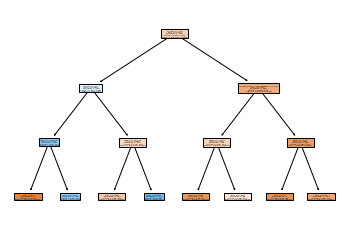

In [47]:
# visualize the model
# plot the decision tree
plot_tree(titanic_model, feature_names=X_train.columns, class_names=['did not survive', 'survived'], filled=True)
plt.show()

In [48]:
# utilize the model to predict the outcome of the test data
# predict the outcome of the test data
y_pred = titanic_model.predict(X_test)
y_pred[0:5]
# estimate the probability of survival
y_prob = titanic_model.predict_proba(X_test)
y_prob[0:5]

array([[0.88732394, 0.11267606],
       [0.2962963 , 0.7037037 ],
       [0.64485981, 0.35514019],
       [0.77391304, 0.22608696],
       [0.55882353, 0.44117647]])

In [49]:
# check the accuracy of the model
print('The accuracy of the model is:', titanic_model.score(X_test, y_test))


The accuracy of the model is: 0.7597765363128491


3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [50]:
# create a model score, confusion matrix, and classification report
# create a model score
titanic_score = titanic_model.score(X_test, y_test)
print('The accuracy of the model is:', titanic_score)

The accuracy of the model is: 0.7597765363128491


In [51]:

# create a confusion matrix
titanic_confusion_matrix = confusion_matrix(y_test, y_pred)
labels = ['did not survive', 'survived']
pd.DataFrame(titanic_confusion_matrix, index=labels, columns=labels)

,did not survive,survived
did not survive,99,11
survived,32,37


In [52]:
# create variable from the classification report
TP = titanic_confusion_matrix[1, 1]
TN = titanic_confusion_matrix[0, 0]
FP = titanic_confusion_matrix[0, 1]
FN = titanic_confusion_matrix[1, 0]

In [53]:
# create a classification report
titanic_classification_report = classification_report(y_test, y_pred)
print(titanic_classification_report)


              precision    recall  f1-score   support

           0       0.76      0.90      0.82       110
           1       0.77      0.54      0.63        69

    accuracy                           0.76       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.76      0.75       179



4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [54]:
# accuracy score
titanic_accuracy_score = accuracy_score(y_test, y_pred)
print('The accuracy of the model is:', titanic_score)
# true positive rate
titanic_tp = TP / (TP + FN)
print('The true positive rate is:', titanic_tp)
# false positive rate
titanic_fp = FP / (FP + TN)
print('The false positive rate is:', titanic_fp)
# true negative rate
titanic_tn = TN / (TN + FP)
print('The true negative rate is:', titanic_tn)
# false negative rate
titanic_fn = FN / (FN + TP)
print('The false negative rate is:', titanic_fn)
# precision
titanic_precision = precision_score(y_test, y_pred)
print('The precision is:', titanic_precision)
# recall
titanic_recall = recall_score(y_test, y_pred)
print('The recall is:', titanic_recall)
# f1 score
titanic_f1 = f1_score(y_test, y_pred)
print('The f1 score is:', titanic_f1)
# support
titanic_support = titanic_confusion_matrix.sum(axis=1)
print('The support is:', titanic_support)


The accuracy of the model is: 0.7597765363128491
The true positive rate is: 0.5362318840579711
The false positive rate is: 0.1
The true negative rate is: 0.9
The false negative rate is: 0.463768115942029
The precision is: 0.7708333333333334
The recall is: 0.5362318840579711
The f1 score is: 0.6324786324786326
The support is: [110  69]


5. Run through steps 2-4 using a different max_depth value.

In [55]:
# change the depth of the decision tree
# create a decision tree model
titanic_model2 = DecisionTreeClassifier(max_depth=2, random_state=1101)
# fit the model
titanic_model2 = titanic_model2.fit(X_train, y_train)

In [56]:
# titanic_model2 model score, confusion matrix, and classification report
# titanic_model2 model score
titanic_score2 = titanic_model2.score(X_test, y_test)
print('The accuracy of the model is:', titanic_score2)
print('-----------------------------------------------')
# titanic_model2 confusion matrix
titanic_confusion_matrix2 = confusion_matrix(y_test, y_pred)
labels = ['did not survive', 'survived']
print(pd.DataFrame(titanic_confusion_matrix2, index=labels, columns=labels))
print('-----------------------------------------------')
# titanic_model2 classification report
titanic_classification_report2 = classification_report(y_test, y_pred)
print(titanic_classification_report2)
print('-----------------------------------------------')

The accuracy of the model is: 0.7039106145251397
-----------------------------------------------
                 did not survive  survived
did not survive               99        11
survived                      32        37
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       110
           1       0.77      0.54      0.63        69

    accuracy                           0.76       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.76      0.75       179

-----------------------------------------------


6. Which model performs better on your in-sample data?
    - Answer: The model 1 performs better 

Which model performs best on your out-of-sample data, the validate set?


In [57]:
print('Accuracy of Decision Tree on validation set: {:.2f}'.format(titanic_model.score(X_validate, y_validate)))
print('Accuracy of Decision Tree on validation set: {:.2f}'.format(titanic_model2.score(X_validate, y_validate)))


Accuracy of Decision Tree on validation set: 0.69
Accuracy of Decision Tree on validation set: 0.67


RANDOM FORESTS:

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [64]:
from sklearn.ensemble import RandomForestClassifier
# create a random forest model 
titanic_rf = RandomForestClassifier(bootstrap=True, class_weight=None, min_samples_leaf=3, n_estimators=100, max_depth=3, random_state=1101)
# fit the model
titanic_rf.fit(X_train, y_train)
# print feature importance
print(titanic_rf.feature_importances_)

[0.2335774  0.10402093 0.06006468 0.44461803 0.08995882 0.01737806
 0.05038208]


In [67]:
# make a prediction
y_pred_rf = titanic_rf.predict(X_test)

In [68]:
# Evaluate the model
print('Accuracy of Random Forest on test set: {:.2f}'.format(titanic_rf.score(X_test, y_test)))

Accuracy of Random Forest on test set: 0.77


In [69]:
# create a confusion matrix
titanic_confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
labels = ['did not survive', 'survived']
pd.DataFrame(titanic_confusion_matrix_rf, index=labels, columns=labels)


,did not survive,survived
did not survive,98,12
survived,29,40


In [70]:
# create a classification report
titanic_classification_report_rf = classification_report(y_test, y_pred_rf)
print(titanic_classification_report_rf)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       110
           1       0.77      0.58      0.66        69

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.77      0.77      0.76       179



In [72]:
# create a model score
titanic_score_rf = titanic_rf.score(X_test, y_test)
print('The accuracy of the model is:', titanic_score_rf)

The accuracy of the model is: 0.770949720670391


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [73]:
# accuracy score
titanic_accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
print('The accuracy of the model is:', titanic_accuracy_score_rf)
# true positive rate
titanic_tp_rf = TP / (TP + FN)
print('The true positive rate is:', titanic_tp_rf)
# false positive rate
titanic_fp_rf = FP / (FP + TN)
print('The false positive rate is:', titanic_fp_rf)
# true negative rate
titanic_tn_rf = TN / (TN + FP)
print('The true negative rate is:', titanic_tn_rf)
# false negative rate
titanic_fn_rf = FN / (FN + TP)
print('The false negative rate is:', titanic_fn_rf)
# precision
titanic_precision_rf = precision_score(y_test, y_pred_rf)
print('The precision is:', titanic_precision_rf)
# recall
titanic_recall_rf = recall_score(y_test, y_pred_rf)
print('The recall is:', titanic_recall_rf)
# f1 score
titanic_f1_rf = f1_score(y_test, y_pred_rf)
print('The f1 score is:', titanic_f1_rf)
# support
titanic_support_rf = titanic_confusion_matrix_rf.sum(axis=1)
print('The support is:', titanic_support_rf)

The accuracy of the model is: 0.770949720670391
The true positive rate is: 0.5362318840579711
The false positive rate is: 0.1
The true negative rate is: 0.9
The false negative rate is: 0.463768115942029
The precision is: 0.7692307692307693
The recall is: 0.5797101449275363
The f1 score is: 0.6611570247933884
The support is: [110  69]


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.